# Nettoyage des données

In [10]:
import os
import tarfile

In [11]:
rootDirectory = './'

In [12]:
tarPath = rootDirectory + 'images.tar'
if os.path.exists(tarPath):
    with tarfile.open(tarPath, 'r') as tar_ref:
        tar_ref.extractall(rootDirectory)
    print(f"Données extraites")
else:
    print(f"Les données sont introuvalbe. Référez vous au README")

Données extraites


In [13]:
imagesFolderPath = 'Images'
os.listdir(imagesFolderPath)

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

## Nettoyage des labels

In [14]:
for i in os.listdir(imagesFolderPath):
    categoryName = i.split('-')
    del categoryName[0]
    categoryName = '_'.join(categoryName).capitalize()
    os.rename(imagesFolderPath + '/' + i, imagesFolderPath +'/' + categoryName)

## Vérification des doublons

In [60]:
import hashlib

hash_fichiers = {}
doublons = []
i = 0
j = len(os.listdir('Images'))
for racine, _, fichiers in os.walk('Images'):
    print(i, '/', j)
    for fichier in fichiers:
        chemin_complet = os.path.join(racine, fichier)

        if fichier.lower().endswith(('.jpg')):
            hasher = hashlib.md5()
            with open(chemin_complet, 'rb') as f:
                for bloc in iter(lambda: f.read(65536), b''):
                    hasher.update(bloc)
            
            hachage = hasher.hexdigest()

            chemin_doublon = hash_fichiers.get(hachage)
            if chemin_doublon:
                doublons.append((chemin_complet, chemin_doublon))
            else:
                hash_fichiers[hachage] = chemin_complet
    i += 1



if doublons:
    for i in doublons:
        os.remove(i[0])
        print(len(doublons), 'doublons supprimés')
else:
    print("Aucune image en doublon trouvée.")


0 / 120
1 / 120
2 / 120
3 / 120
4 / 120
5 / 120
6 / 120
7 / 120
8 / 120
9 / 120
10 / 120
11 / 120
12 / 120
13 / 120
14 / 120
15 / 120
16 / 120
17 / 120
18 / 120
19 / 120
20 / 120
21 / 120
22 / 120
23 / 120
24 / 120
25 / 120
26 / 120
27 / 120
28 / 120
29 / 120
30 / 120
31 / 120
32 / 120
33 / 120
34 / 120
35 / 120
36 / 120
37 / 120
38 / 120
39 / 120
40 / 120
41 / 120
42 / 120
43 / 120
44 / 120
45 / 120
46 / 120
47 / 120
48 / 120
49 / 120
50 / 120
51 / 120
52 / 120
53 / 120
54 / 120
55 / 120
56 / 120
57 / 120
58 / 120
59 / 120
60 / 120
61 / 120
62 / 120
63 / 120
64 / 120
65 / 120
66 / 120
67 / 120
68 / 120
69 / 120
70 / 120
71 / 120
72 / 120
73 / 120
74 / 120
75 / 120
76 / 120
77 / 120
78 / 120
79 / 120
80 / 120
81 / 120
82 / 120
83 / 120
84 / 120
85 / 120
86 / 120
87 / 120
88 / 120
89 / 120
90 / 120
91 / 120
92 / 120
93 / 120
94 / 120
95 / 120
96 / 120
97 / 120
98 / 120
99 / 120
100 / 120
101 / 120
102 / 120
103 / 120
104 / 120
105 / 120
106 / 120
107 / 120
108 / 120
109 / 120
110 / 120


## Équilibrage des données

In [61]:
for i in os.listdir(imagesFolderPath):
    print(i , '-', len(os.listdir(imagesFolderPath + '/' + i)))

Affenpinscher - 150
Afghan_hound - 239
African_hunting_dog - 169
Airedale - 202
American_staffordshire_terrier - 164
Appenzeller - 151
Australian_terrier - 196
Basenji - 209
Basset - 175
Beagle - 195
Bedlington_terrier - 179
Bernese_mountain_dog - 216
Black_and_tan_coonhound - 159
Blenheim_spaniel - 187
Bloodhound - 186
Bluetick - 168
Border_collie - 150
Border_terrier - 172
Borzoi - 151
Boston_bull - 182
Bouvier_des_flandres - 150
Boxer - 151
Brabancon_griffon - 146
Briard - 152
Brittany_spaniel - 152
Bull_mastiff - 156
Cairn - 197
Cardigan - 154
Chesapeake_bay_retriever - 167
Chihuahua - 152
Chow - 196
Clumber - 149
Cocker_spaniel - 159
Collie - 147
Curly_coated_retriever - 150
Dandie_dinmont - 180
Dhole - 145
Dingo - 155
Doberman - 150
English_foxhound - 157
English_setter - 161
English_springer - 159
Entlebucher - 201
Eskimo_dog - 150
Flat_coated_retriever - 152
French_bulldog - 159
German_shepherd - 152
German_short_haired_pointer - 152
Giant_schnauzer - 156
Golden_retriever - 150

Les classes ont un nombres de données très irrégulier

### Récupération de la plus petite représentation

In [62]:
min = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
max = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
for category in os.listdir(imagesFolderPath):
    if min > len(os.listdir(imagesFolderPath + '/' + category)):
        min = len(os.listdir(imagesFolderPath + '/' + category))
    if max < len(os.listdir(imagesFolderPath + '/' + category)):
        max = len(os.listdir(imagesFolderPath + '/' + category))

print('Nombre d\'image dans la plus petite catégorie: ', min)
print('Nombre d\'image dans la plus grande catégorie: ', max)

Nombre d'image dans la plus petite catégorie:  145
Nombre d'image dans la plus grande catégorie:  252


### Sous échantillonage des données

In [63]:
import random

In [64]:
# Parcourez les sous-dossiers dans le dossier principal
for category in os.listdir(imagesFolderPath):
    categoryPath = os.path.join(imagesFolderPath, category)
    
    categoryImages = os.listdir(categoryPath)
    if len(categoryImages) > min:
        toDelete = random.sample(categoryImages, len(categoryImages) - min)
        
        for file in toDelete:
            path = os.path.join(categoryPath, file)
            os.remove(path)
            print(f"Supprimé : {path}")


Supprimé : Images\Affenpinscher\n02110627_7612.jpg
Supprimé : Images\Affenpinscher\n02110627_10147.jpg
Supprimé : Images\Affenpinscher\n02110627_2383.jpg
Supprimé : Images\Affenpinscher\n02110627_8519.jpg
Supprimé : Images\Affenpinscher\n02110627_1581.jpg
Supprimé : Images\Afghan_hound\n02088094_115.jpg
Supprimé : Images\Afghan_hound\n02088094_1841.jpg
Supprimé : Images\Afghan_hound\n02088094_1335.jpg
Supprimé : Images\Afghan_hound\n02088094_2641.jpg
Supprimé : Images\Afghan_hound\n02088094_3252.jpg
Supprimé : Images\Afghan_hound\n02088094_5504.jpg
Supprimé : Images\Afghan_hound\n02088094_11570.jpg
Supprimé : Images\Afghan_hound\n02088094_2803.jpg
Supprimé : Images\Afghan_hound\n02088094_13879.jpg
Supprimé : Images\Afghan_hound\n02088094_3613.jpg
Supprimé : Images\Afghan_hound\n02088094_13742.jpg
Supprimé : Images\Afghan_hound\n02088094_3582.jpg
Supprimé : Images\Afghan_hound\n02088094_11953.jpg
Supprimé : Images\Afghan_hound\n02088094_13442.jpg
Supprimé : Images\Afghan_hound\n02088094

In [65]:
min = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
max = len(os.listdir(imagesFolderPath + '/' + os.listdir(imagesFolderPath)[0]))
for category in os.listdir(imagesFolderPath):
    if min > len(os.listdir(imagesFolderPath + '/' + category)):
        min = len(os.listdir(imagesFolderPath + '/' + category))
    if max < len(os.listdir(imagesFolderPath + '/' + category)):
        max = len(os.listdir(imagesFolderPath + '/' + category))

print('Nombre d\'image dans la plus petite catégorie: ', min)
print('Nombre d\'image dans la plus grande catégorie: ', max)

Nombre d'image dans la plus petite catégorie:  145
Nombre d'image dans la plus grande catégorie:  145


## Séparation en donnée de train et test

In [66]:
import shutil


trainDirectory = 'train'
testDirectory = 'test'

os.makedirs(trainDirectory, exist_ok=True)
os.makedirs(testDirectory, exist_ok=True)

trainProportion = 0.8

for category in os.listdir(imagesFolderPath):
    print(category)
    categoryPath = os.path.join(imagesFolderPath, category)
    
    # Assurez-vous que c'est bien un dossier
    if os.path.isdir(categoryPath):
        files = os.listdir(categoryPath)
        
        random.shuffle(files)
        
        nbrTotal = len(files)
        nombre_entrainement = int(trainProportion * nbrTotal)
        
        trainingFiles = files[:nombre_entrainement]
        testingFiles = files[nombre_entrainement:]
        
        os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
        os.makedirs(os.path.join(testDirectory, category), exist_ok=True)
        
        for file in trainingFiles:
            shutil.copy(os.path.join(categoryPath, file), os.path.join(trainDirectory, category, file))
        for file in testingFiles:
            shutil.copy(os.path.join(categoryPath, file), os.path.join(testDirectory, category, file))


Affenpinscher
Afghan_hound
African_hunting_dog
Airedale
American_staffordshire_terrier
Appenzeller
Australian_terrier
Basenji
Basset
Beagle
Bedlington_terrier
Bernese_mountain_dog
Black_and_tan_coonhound
Blenheim_spaniel
Bloodhound
Bluetick
Border_collie
Border_terrier
Borzoi
Boston_bull
Bouvier_des_flandres
Boxer
Brabancon_griffon
Briard
Brittany_spaniel
Bull_mastiff
Cairn
Cardigan
Chesapeake_bay_retriever
Chihuahua
Chow
Clumber
Cocker_spaniel
Collie
Curly_coated_retriever
Dandie_dinmont
Dhole
Dingo
Doberman
English_foxhound
English_setter
English_springer
Entlebucher
Eskimo_dog
Flat_coated_retriever
French_bulldog
German_shepherd
German_short_haired_pointer
Giant_schnauzer
Golden_retriever
Gordon_setter
Greater_swiss_mountain_dog
Great_dane
Great_pyrenees
Groenendael
Ibizan_hound
Irish_setter
Irish_terrier
Irish_water_spaniel
Irish_wolfhound
Italian_greyhound
Japanese_spaniel
Keeshond
Kelpie
Kerry_blue_terrier
Komondor
Kuvasz
Labrador_retriever
Lakeland_terrier
Leonberg
Lhasa
Malamut

In [67]:
print('image par catégorie pour l\'entrainement: ', len(os.listdir('train/Pug')))
print('image par catégorie pour le test : ', len(os.listdir('test/Pug')))

image par catégorie pour l'entrainement:  165
image par catégorie pour le test :  54


## Échantillon des données

In [68]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image

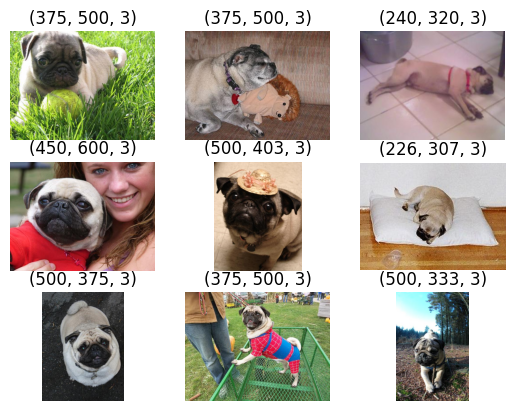

In [94]:
sample = [os.listdir('Images/Pug')[index] for index in random.sample(range(0, len(os.listdir('Images/Pug'))), 9)]
for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'Images/' + 'Pug/' + sample[i]
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)
    plt.axis('Off')